In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# import red wine csv
reds = pd.read_csv("winequality-red.csv", delimiter=';')

In [3]:
# import white wine csv
whites = pd.read_csv("winequality-white.csv", delimiter=';')

In [4]:
# add 1 designation to reds
# this will be detached before clustering, but added now for simplicity
# entire new column "type" will be filled with 1
reds["type"] = 1

# add 0 designation to whites
# this will be detached before clustering, but added now for simplicity
# entire new column "type" will be filled with 0
whites["type"] = 0

In [5]:
# drop quality columns from main DFs into new DFs
reds_noqual = reds.drop(columns=["quality"])
whites_noqual = whites.drop(columns=["quality"])

In [6]:
# combine the two dataframes into a single one
# concat along axis so more rows are added, keeping columns the same

combined_withtypes = pd.concat([reds_noqual, whites_noqual])

# reset index values
combined_withtypes.reset_index(inplace=True, drop=True)

In [7]:
# split off type column since we don't want it in the clustering.
combined_types = combined_withtypes[["type"]].copy()

combined_notypes = combined_withtypes.drop(columns=['type'])

In [8]:
# use a standardscaler

combined_standscaled = StandardScaler().fit_transform(combined_notypes)

In [9]:
# initialize KMeans models
# since we're predicting red vs white scaling, we want n_clusters=2
standscalKMeans = KMeans(n_clusters=2, random_state=5)

In [10]:
# fit KMeans model

standscalKMeans.fit(combined_standscaled)

KMeans(n_clusters=2, random_state=5)

In [11]:
# make predictions from KMeans fit

standscalPreds = standscalKMeans.predict(combined_standscaled)

In [12]:
# add the predictions to the combined_withtypes dataframe
combined_withtypes["StandScalePreds"] = standscalPreds

In [13]:
# value_counts() on two columns is effectively a confusion matrix

combined_withtypes[["type", "StandScalePreds"]].value_counts()

# whites predicted as class 0: 4830 out of 4898 = 98.6%
# whites predicted as class 1: 68 out of 4898 = 1.4%

# reds predicted as class 1: 1575 out of 1599 = 98.5%
# reds predicted as class 0 : 24 out of 1599 = 1.5%

type  StandScalePreds
0     0                  4830
1     1                  1575
0     1                    68
1     0                    24
dtype: int64

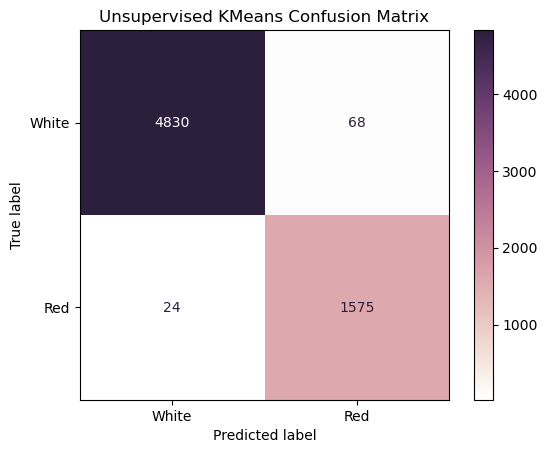

In [14]:
dis=ConfusionMatrixDisplay(confusion_matrix(combined_withtypes['type'], combined_withtypes['StandScalePreds']),
                           display_labels=['White', 'Red'])
dis.plot(cmap = sns.cubehelix_palette(light=1, as_cmap=True))
plt.title("Unsupervised KMeans Confusion Matrix")
plt.savefig("static/images/kmeans_confusion_matrix.png", bbox_inches='tight')
plt.show()

In [15]:
# for plotting with matplotlib, need to split up dataframe

# correctly guessed reds
trueReds = combined_withtypes[((combined_withtypes['type']==1) & (combined_withtypes["StandScalePreds"]==1))].copy()

# correctly guessed whites
trueWhites = combined_withtypes[((combined_withtypes['type']==0) & (combined_withtypes["StandScalePreds"]==0))].copy()

# white wines guessed reds
falseReds = combined_withtypes[((combined_withtypes['type']==0) & (combined_withtypes["StandScalePreds"]==1))].copy()

# red wines guessed whites
falseWhites = combined_withtypes[((combined_withtypes['type']==1) & (combined_withtypes["StandScalePreds"]==0))].copy()


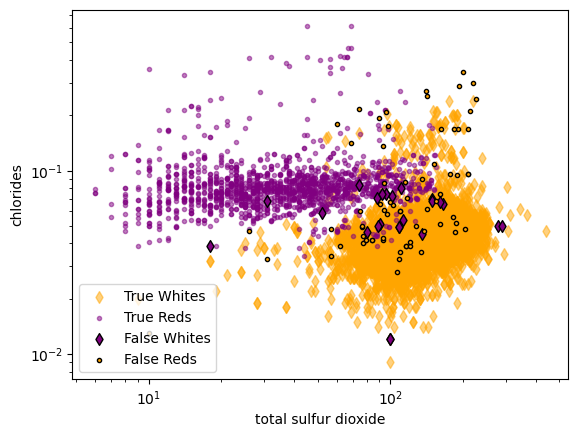

In [16]:
# total sulfur dioxide vs chlorides show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

# plot whites first since there are more and reds will be on top of them

plt.scatter(trueWhites['total sulfur dioxide'], trueWhites['chlorides'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['total sulfur dioxide'], trueReds['chlorides'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['total sulfur dioxide'], falseWhites['chlorides'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['total sulfur dioxide'], falseReds['chlorides'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("chlorides")
plt.xlabel("total sulfur dioxide")
plt.legend()
plt.show()

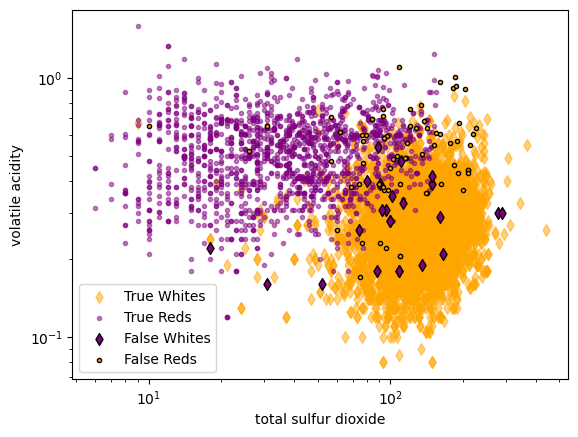

In [17]:
# total sulfur dioxide vs volatile acidity also show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

plt.scatter(trueWhites['total sulfur dioxide'], trueWhites['volatile acidity'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['total sulfur dioxide'], trueReds['volatile acidity'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['total sulfur dioxide'], falseWhites['volatile acidity'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['total sulfur dioxide'], falseReds['volatile acidity'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("volatile acidity")
plt.xlabel("total sulfur dioxide")
plt.legend()
plt.show()

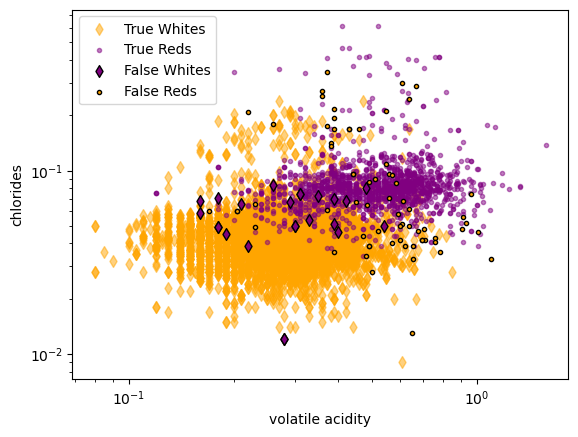

In [18]:
# chlorides vs volatile acidity also show separation

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

plt.scatter(trueWhites['volatile acidity'], trueWhites['chlorides'], 
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['volatile acidity'], trueReds['chlorides'], 
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['volatile acidity'], falseWhites['chlorides'], 
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['volatile acidity'], falseReds['chlorides'], 
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("chlorides")
plt.xlabel("volatile acidity")
plt.legend()
plt.show()

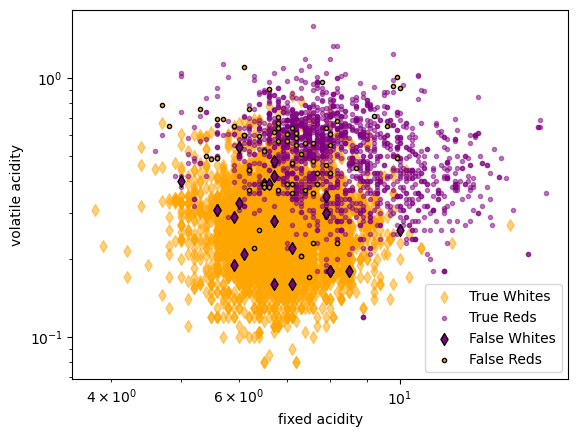

In [19]:
# fixed acidity and volatile acidity

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

plt.scatter(trueWhites['fixed acidity'], trueWhites['volatile acidity'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['fixed acidity'], trueReds['volatile acidity'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['fixed acidity'], falseWhites['volatile acidity'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['fixed acidity'], falseReds['volatile acidity'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("volatile acidity")
plt.xlabel("fixed acidity")
plt.legend()
plt.show()

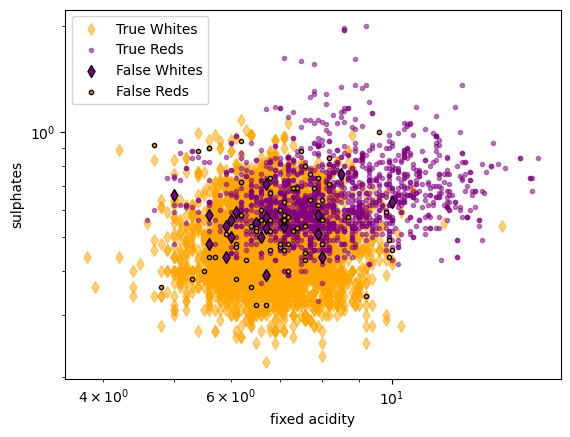

In [20]:
# fixed acidity and sulphates

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

plt.scatter(trueWhites['fixed acidity'], trueWhites['sulphates'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
plt.scatter(trueReds['fixed acidity'], trueReds['sulphates'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
plt.scatter(falseWhites['fixed acidity'], falseWhites['sulphates'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
plt.scatter(falseReds['fixed acidity'], falseReds['sulphates'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("sulphates")
plt.xlabel("fixed acidity")
plt.legend()

In [21]:
# can make 2x2 single large plot of various plots if desired

# too crowded, do not use

# fig, axs = plt.subplots(2,2, figsize=(15,12))

# axs[0,0].scatter(trueWhites['total sulfur dioxide'], trueWhites['chlorides'],
#             color='orange', marker='d', label='True Whites', alpha=0.5)
# axs[0,0].scatter(trueReds['total sulfur dioxide'], trueReds['chlorides'],
#             color='purple', marker='.', label="True Reds", alpha=0.5)
# axs[0,0].scatter(falseWhites['total sulfur dioxide'], falseWhites['chlorides'],
#             color='purple', marker='d', label='False Whites', edgecolors='k')
# axs[0,0].scatter(falseReds['total sulfur dioxide'], falseReds['chlorides'],
#             color='orange', marker='.', label='False Reds', edgecolors='k')
# axs[0,0].set_xscale('log')
# axs[0,0].set_yscale('log')
# axs[0,0].set_ylabel("chlorides")
# axs[0,0].set_xlabel("total sulfur dioxide")

# axs[1,0].scatter(trueWhites['total sulfur dioxide'], trueWhites['volatile acidity'],
#             color='orange', marker='d', label='True Whites', alpha=0.5)
# axs[1,0].scatter(trueReds['total sulfur dioxide'], trueReds['volatile acidity'],
#             color='purple', marker='.', label="True Reds", alpha=0.5)
# axs[1,0].scatter(falseWhites['total sulfur dioxide'], falseWhites['volatile acidity'],
#             color='purple', marker='d', label='False Whites', edgecolors='k')
# axs[1,0].scatter(falseReds['total sulfur dioxide'], falseReds['volatile acidity'],
#             color='orange', marker='.', label='False Reds', edgecolors='k')
# axs[1,0].set_xscale('log')
# axs[1,0].set_yscale('log')
# axs[1,0].set_ylabel("volatile acidity")
# axs[1,0].set_xlabel("total sulfur dioxide")

# axs[0,1].scatter(trueWhites['fixed acidity'], trueWhites['sulphates'],
#             color='orange', marker='d', label='True Whites', alpha=0.5)
# axs[0,1].scatter(trueReds['fixed acidity'], trueReds['sulphates'],
#             color='purple', marker='.', label="True Reds", alpha=0.5)
# axs[0,1].scatter(falseWhites['fixed acidity'], falseWhites['sulphates'],
#             color='purple', marker='d', label='False Whites', edgecolors='k')
# axs[0,1].scatter(falseReds['fixed acidity'], falseReds['sulphates'],
#             color='orange', marker='.', label='False Reds', edgecolors='k')
# axs[0,1].set_xscale('log')
# axs[0,1].set_yscale('log')
# axs[0,1].set_ylabel("sulphates")
# axs[0,1].set_xlabel("fixed acidity")


# axs[1,1].scatter(trueWhites['fixed acidity'], trueWhites["volatile acidity"],
#             color='orange', marker='d', label='True Whites', alpha=0.5)
# axs[1,1].scatter(trueReds['fixed acidity'], trueReds["volatile acidity"],
#             color='purple', marker='.', label="True Reds", alpha=0.5)
# axs[1,1].scatter(falseWhites['fixed acidity'], falseWhites["volatile acidity"],
#             color='purple', marker='d', label='False Whites', edgecolors='k')
# axs[1,1].scatter(falseReds['fixed acidity'], falseReds["volatile acidity"],
#             color='orange', marker='.', label='False Reds', edgecolors='k')
# axs[1,1].set_xscale('log')
# axs[1,1].set_yscale('log')
# axs[1,1].set_ylabel("volatile acidity")
# axs[1,1].set_xlabel("fixed acidity")


# axs[0,1].legend()
# #fig.legend()
# fig.suptitle("Unsupervised KMeans Clustering")

In [22]:
# alcohol vs density does not show separation, do not use

# correct combos: r, 1 = purple circle and w, 0 = orange diamond

# plt.scatter(trueWhites['density'], trueWhites['alcohol'],
#             color='orange', marker='d', label='True Whites', alpha=0.5)
# plt.scatter(trueReds['density'], trueReds['alcohol'],
#             color='purple', marker='.', label="True Reds", alpha=0.5)
# plt.scatter(falseWhites['density'], falseWhites['alcohol'],
#             color='purple', marker='d', label='False Whites', edgecolors='k')
# plt.scatter(falseReds['density'], falseReds['alcohol'],
#             color='orange', marker='.', label='False Reds', edgecolors='k')
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel("alcohol")
# plt.xlabel("density")
# plt.legend()

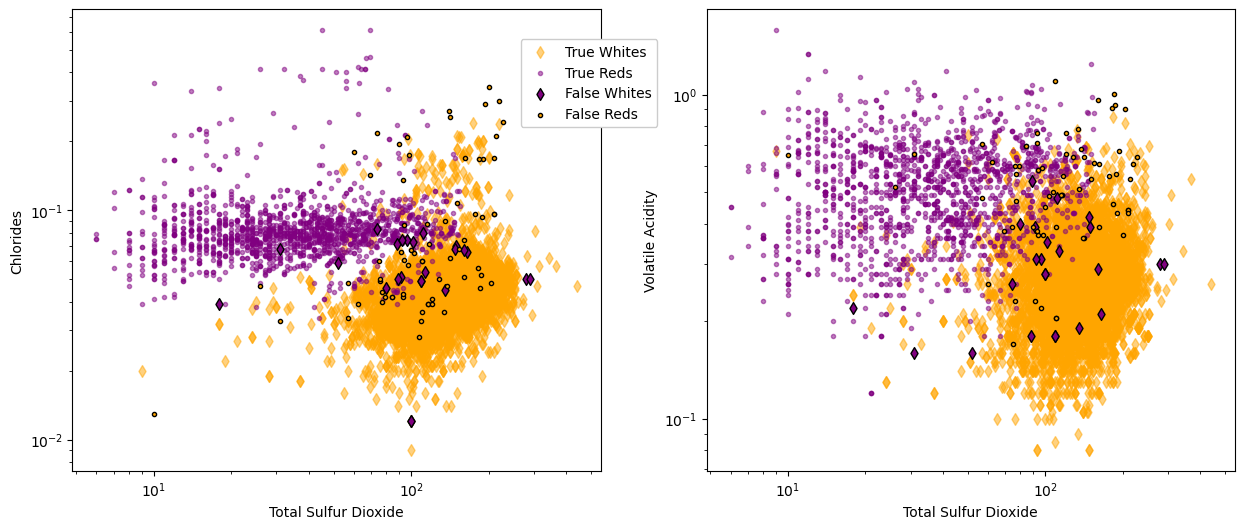

In [23]:
# can do 2x1 plots to look nice

# chlorides vs total sulfur dioxide and
# volatile acidity vs total sulfur dioxide

fig, axs = plt.subplots(1,2, figsize=(15,6))

axs[0].scatter(trueWhites['total sulfur dioxide'], trueWhites['chlorides'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
axs[0].scatter(trueReds['total sulfur dioxide'], trueReds['chlorides'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
axs[0].scatter(falseWhites['total sulfur dioxide'], falseWhites['chlorides'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
axs[0].scatter(falseReds['total sulfur dioxide'], falseReds['chlorides'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel('Chlorides')
axs[0].set_xlabel('Total Sulfur Dioxide')


axs[1].scatter(trueWhites['total sulfur dioxide'], trueWhites['volatile acidity'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
axs[1].scatter(trueReds['total sulfur dioxide'], trueReds['volatile acidity'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
axs[1].scatter(falseWhites['total sulfur dioxide'], falseWhites['volatile acidity'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
axs[1].scatter(falseReds['total sulfur dioxide'], falseReds['volatile acidity'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel('Volatile Acidity')
axs[1].set_xlabel('Total Sulfur Dioxide')


axs[0].legend(loc="upper right", bbox_to_anchor=(1.12, 0.95), framealpha=1)
#fig.suptitle("Unsupervised KMeans Clustering Scatter Plots 1")
fig.savefig("static/images/kmeans_scatter_1.png", bbox_inches='tight', pad_inches=0.23)
plt.show()

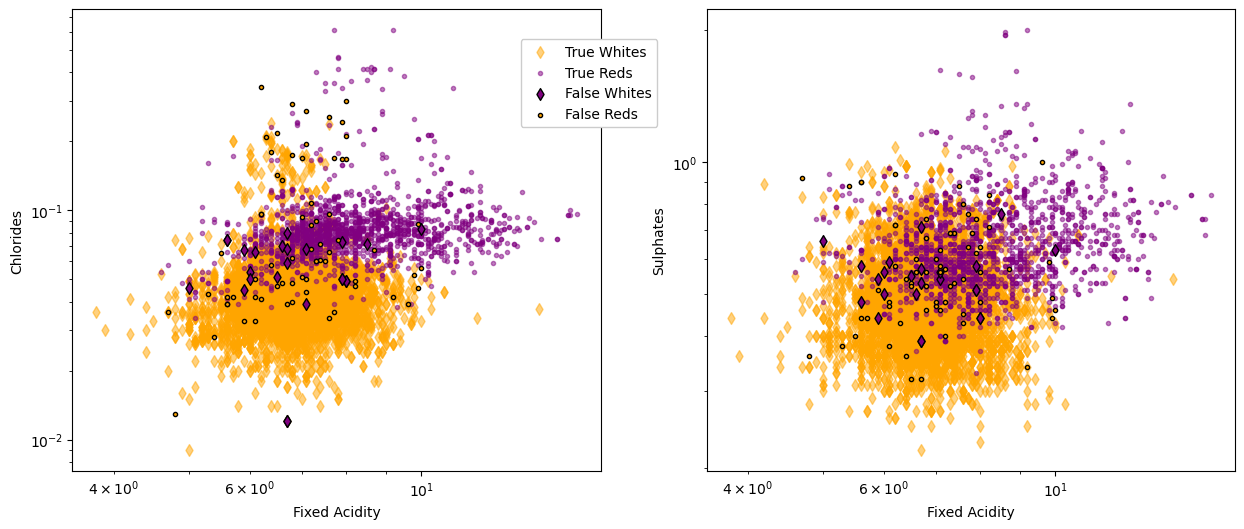

In [24]:
# can do 2x1 plots to look nice

# chlorides vs fixed acidity and
# sulphates vs fixed acidity

fig, axs = plt.subplots(1,2, figsize=(15,6))

axs[0].scatter(trueWhites['fixed acidity'], trueWhites['chlorides'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
axs[0].scatter(trueReds['fixed acidity'], trueReds['chlorides'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
axs[0].scatter(falseWhites['fixed acidity'], falseWhites['chlorides'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
axs[0].scatter(falseReds['fixed acidity'], falseReds['chlorides'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel('Chlorides')
axs[0].set_xlabel('Fixed Acidity')


axs[1].scatter(trueWhites['fixed acidity'], trueWhites['sulphates'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
axs[1].scatter(trueReds['fixed acidity'], trueReds['sulphates'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
axs[1].scatter(falseWhites['fixed acidity'], falseWhites['sulphates'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
axs[1].scatter(falseReds['fixed acidity'], falseReds['sulphates'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel('Sulphates')
axs[1].set_xlabel('Fixed Acidity')



axs[0].legend(loc="upper right", bbox_to_anchor=(1.12, 0.95), framealpha=1)
#fig.suptitle("Unsupervised KMeans Clustering Scatter Plots 2")
fig.savefig("static/images/kmeans_scatter_2.png", bbox_inches='tight', pad_inches=0.23)
plt.show()

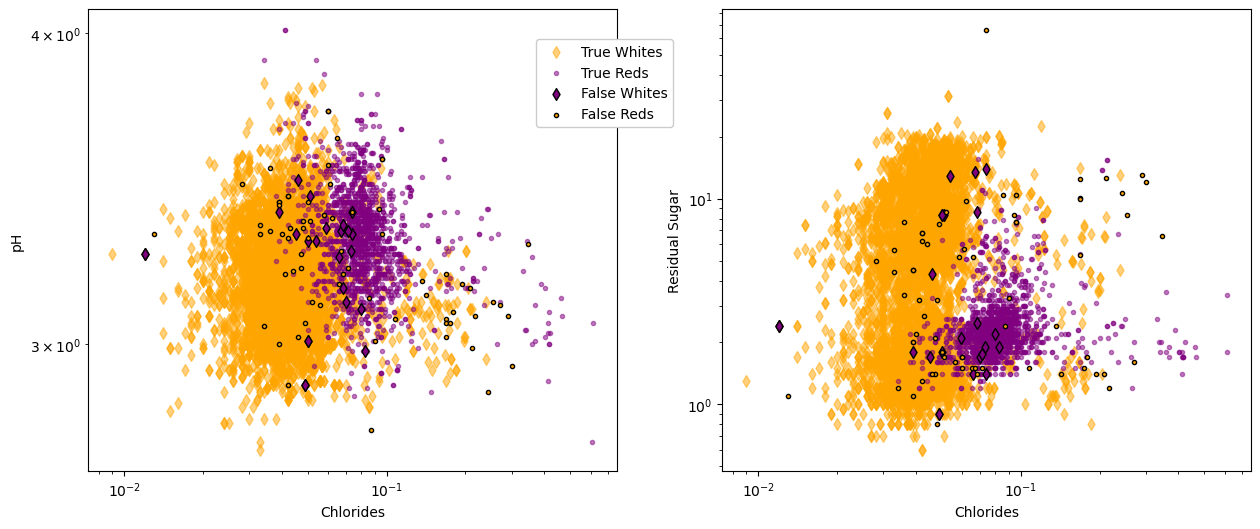

In [25]:
# can do 2x1 plots to look nice

# pH vs chlorides and
# sulphates vs fixed acidity

fig, axs = plt.subplots(1,2, figsize=(15,6))

axs[0].scatter(trueWhites['chlorides'], trueWhites['pH'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
axs[0].scatter(trueReds['chlorides'], trueReds['pH'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
axs[0].scatter(falseWhites['chlorides'], falseWhites['pH'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
axs[0].scatter(falseReds['chlorides'], falseReds['pH'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylabel('pH')
axs[0].set_xlabel('Chlorides')


axs[1].scatter(trueWhites['chlorides'], trueWhites['residual sugar'],
            color='orange', marker='d', label='True Whites', alpha=0.5)
axs[1].scatter(trueReds['chlorides'], trueReds['residual sugar'],
            color='purple', marker='.', label="True Reds", alpha=0.5)
axs[1].scatter(falseWhites['chlorides'], falseWhites['residual sugar'],
            color='purple', marker='d', label='False Whites', edgecolors='k')
axs[1].scatter(falseReds['chlorides'], falseReds['residual sugar'],
            color='orange', marker='.', label='False Reds', edgecolors='k')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_ylabel('Residual Sugar')
axs[1].set_xlabel('Chlorides')



axs[0].legend(loc="upper right", bbox_to_anchor=(1.12, 0.95), framealpha=1)
#fig.suptitle("Unsupervised KMeans Clustering Scatter Plots 3")
fig.savefig("static/images/kmeans_scatter_3.png", bbox_inches='tight', pad_inches=0.23)
plt.show()